# Zombie invasion model

## Introduction

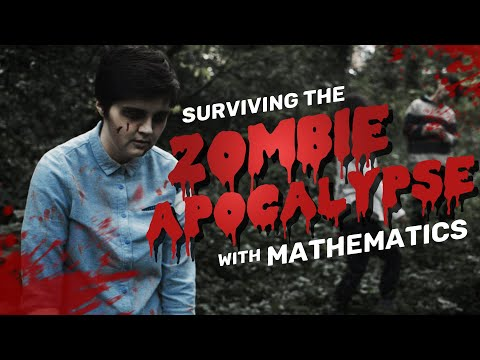

In [1]:
import IPython
IPython.display.YouTubeVideo("t1__PGs49jU")

In this example we will solve a system of first order ODEs using one of the numerical methods presented in the course. The following model is used to model a zombie invasion :

$$\left\{ \begin{array}{ll}
\displaystyle \frac{\mathrm{d}S}{\mathrm{d}t} &= \Pi -\displaystyle \beta S Z - \delta S,\\[4mm]
\displaystyle \frac{\mathrm{d}Z}{\mathrm{d}t} &= \displaystyle \beta S Z + \zeta R - \alpha Z S,\\[4mm]
\displaystyle\frac{\mathrm{d}R}{\mathrm{d}t} &= \delta S + \alpha \displaystyle Z S - \zeta R.
\end{array} \right.$$

Where this compartmental model includes three types of individuals : susceptible individuals $S$, zombies $Z$, and removed individuals $R$ who died either from a zombie attack or naturally.

* $\Pi$ : birth rate (assumed constant)
* $\delta$  : natural mortality rate
* $\zeta$ : resurrection rate into zombie after death
* $\beta$ : rate of becoming a zombie after contact with a zombie $Z$
* $\alpha$ : total destruction rate of a zombie

Some additional resource for more details :

[When Zombies attack !](https://mysite.science.uottawa.ca/rsmith43/Zombies.pdf)

This is a more complicated model than the SIR model seen previously 

## Model diagram

The diagram below sums up the zombie invasion model that we studied.

In [2]:
from IPython.core.display import SVG
import svgutils.transform as sg
from IPython.display import SVG,display
#fig = sg.SVGFigure("20cm", "10cm")
#fig1 = sg.fromfile('zombieDiagram.svg')
#plot1 = fig1.getroot()
#fig.append([plot1])
#fig.save("zombieDiagram2.svg")
#display(SVG(filename='zombieDiagram2.svg'))

In [3]:
display(SVG(filename='zombieDiagram2.svg'))

In [4]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

### Numerical values for apocalypse zombie

In [5]:
Pi =  0. #birth rate
delta = 1.e-4 #natural death rate
beta = 9.5e-3 #contact rate
zeta = 1.e-4 #resurrection rate 
alpha = 1.e-4 #destruction rate 

In [6]:
S0 = 1000 #initial population
Z0, R0 = 0, 0
X0 = S0, Z0, R0
tmax = 10
Nt = 160
t = np.linspace(0, tmax, Nt+1) #time grid

## Part 1 : Reformulation of the problem

* This problem can be reformulated to match the standard formulation $\dot X = f(X, t)$:

$$
X = \begin{pmatrix} S \\
Z \\
R \end{pmatrix}
$$

$$
\quad \dot{X} = 
\begin{pmatrix} \Pi -\displaystyle \beta S Z - \delta S\\ 
\displaystyle \displaystyle \beta S Z + \zeta R - \alpha Z S \\
\delta S + \alpha \displaystyle Z S - \zeta R 
\end{pmatrix} 
= F\left(X\right)
$$

* Write the function $f$ in Python :

In [7]:
def derivative(X, t, Pi, delta, beta, zeta, alpha):
    S, Z, R = X
    dotS = Pi - beta * S * Z - delta * S
    dotZ = beta * S * Z + zeta * R - alpha * Z * S
    dotR = delta * S + alpha * Z * S - zeta * R
    return np.array([dotS, dotZ, dotR])

## Part 2 : Solving

Solve the ODE using `odeint` and plot it. 

<IPython.core.display.Javascript object>


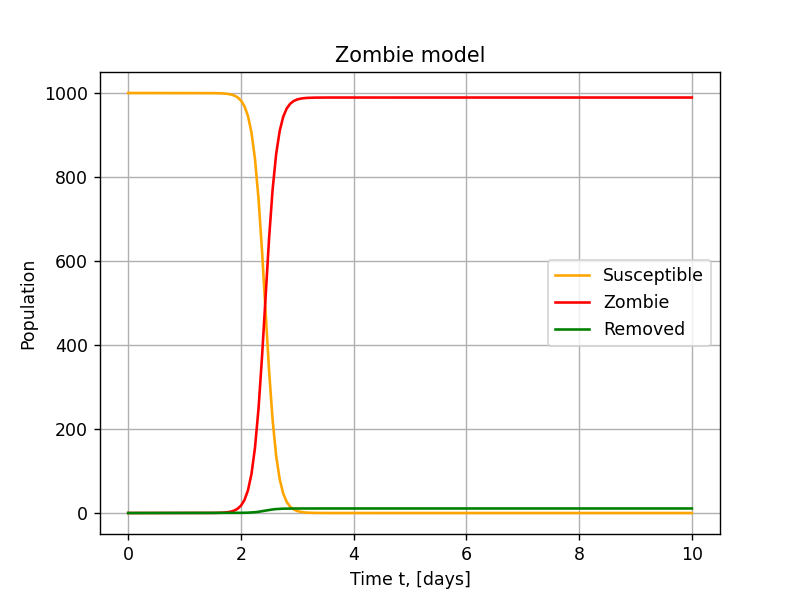

In [8]:
X = integrate.odeint(derivative, X0, t, args = (Pi, delta, beta, zeta, alpha))
S, Z, R = X.T #X.T order 3 x (Nt+1)

plt.figure()
plt.grid()
plt.title("Zombie model")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, Z, 'r', label='Zombie')
plt.plot(t, R, 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();

### Testing with different initial conditions and different numerical values : 
* $R(0)$ is 1% of the initial population size $S(0)$


* $\Pi$ = 8 (8 new birth by day)

<IPython.core.display.Javascript object>


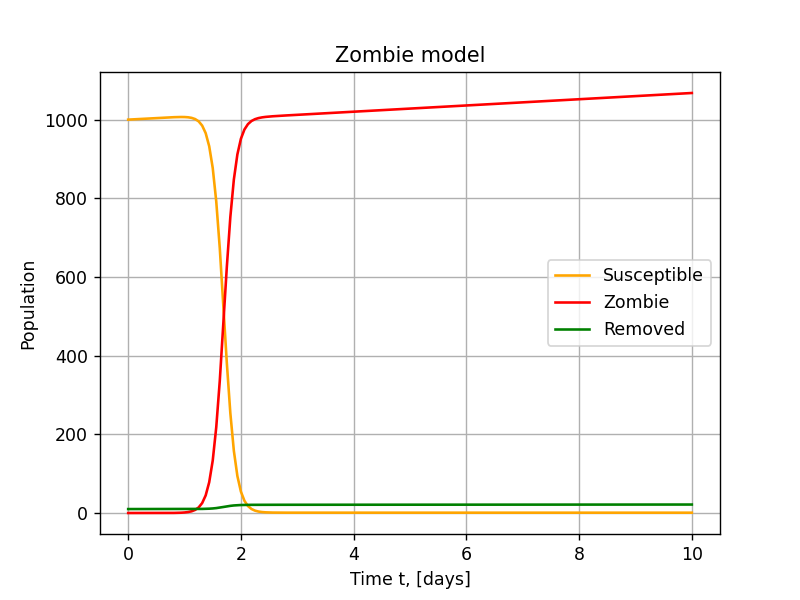

In [9]:
R0 = 0.01 * S0
X0 = S0, Z0, R0
Pi = 8
X = integrate.odeint(derivative, X0, t, args =(Pi, delta, beta, zeta, alpha))
S, Z, R = X.T #X.T order 3 x (Nt+1)

plt.figure()
plt.grid()
plt.title("Zombie model")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, Z, 'r', label='Zombie')
plt.plot(t, R, 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();

Now, solving with explicit Euler and RK4 methods. Compare methods.

In [10]:
def Euler(func, X0, t, Pi, delta, beta, zeta, alpha):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1): 
        X[i+1] = X[i] + func(X[i], t[i], Pi, delta, beta, zeta, alpha) * dt
    return X

In [11]:
def RK4(func, X0, t, Pi, delta, beta, zeta, alpha):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], Pi, delta, beta, zeta, alpha)
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2., Pi, delta, beta, zeta, alpha)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2., Pi, delta, beta, zeta, alpha)
        k4 = func(X[i] + dt    * k3, t[i] + dt, Pi, delta, beta, zeta, alpha)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

<IPython.core.display.Javascript object>


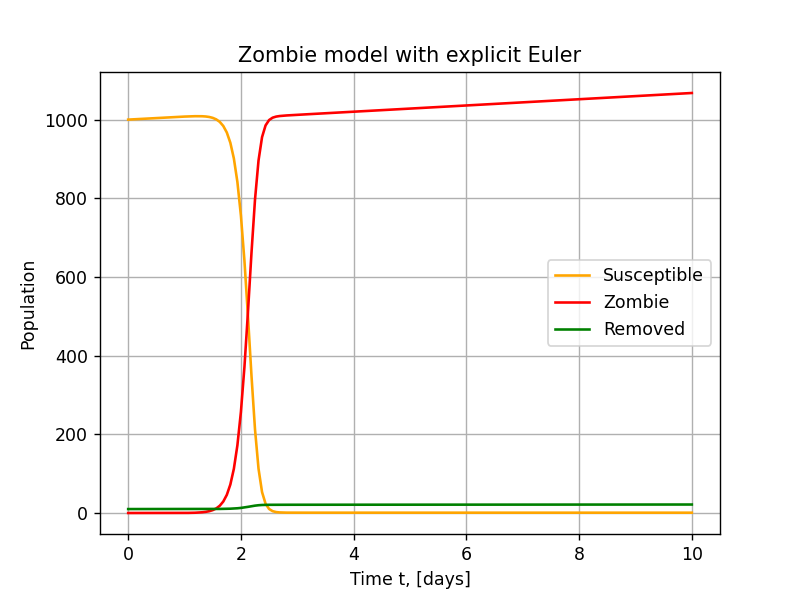

In [12]:
Xe = Euler(derivative, X0, t, Pi, delta, beta, zeta, alpha)

plt.figure()
plt.grid()
plt.title("Zombie model with explicit Euler")
plt.plot(t, Xe[:,0], 'orange', label='Susceptible')
plt.plot(t, Xe[:,1], 'r', label='Zombie')
plt.plot(t, Xe[:,2], 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();

<IPython.core.display.Javascript object>


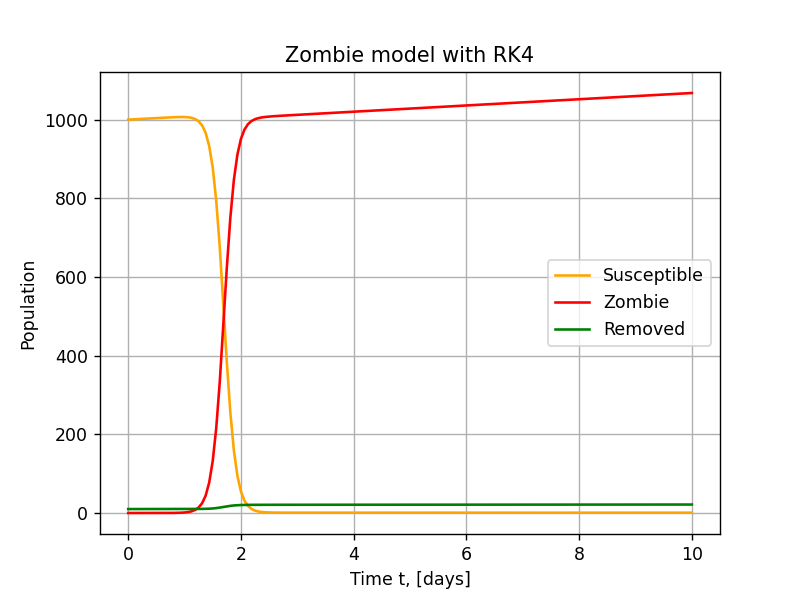

In [13]:
Xrk4 = RK4(derivative, X0, t, Pi, delta, beta, zeta, alpha)

plt.figure()
plt.grid()
plt.title("Zombie model with RK4")
plt.plot(t, Xrk4[:,0], 'orange', label='Susceptible')
plt.plot(t, Xrk4[:,1], 'r', label='Zombie')
plt.plot(t, Xrk4[:,2], 'g', label='Removed')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show();